# Neural Network

### Forward propagation
$x_i$ = input layer<br>
$w_i$ = weights<br>
$b$ = bias<br>
$z$ = hidden layer<br>
$f(z)$ = activation<br>

$z = \sum\limits_{i=1}^{n}x_iw_i + b$<br>
Given Sigmoid as activation function: $f(H) = \frac{1}{1+e^{-z}}$

**Remark**<br>
$w_i$ for b is 1<br>
Which activation function to choose depends on the prediction output: number/category<br>
If numerical output, MSE loss function will be used, reLU, linear(Identity) activation will be used.<br>
If categorical output, cross entropy loss function will be used, sigmoid, tanh, softmax (non linear) activation function will be used.



### Back propagation
incrementally tweaking the network’s weights until the lowest possible cost value is obtained.

### Partial derivative for $w_i$: $\frac{\partial C}{\partial w_i} = \frac{\partial C}{\partial \hat{y}} * \frac{\partial \hat{y}}{\partial z} * \frac{\partial z}{\partial w_i}$

1. $\frac{\partial C}{\partial \hat{y}} = \frac{\partial}{\partial \hat{y}}\frac{1}{n}\sum\limits_{i=1}^{n}(y_i-\hat{y_i})^2 = \frac{2}{n}\sum\limits_{1=1}^{n}(y_i-\hat{y_i})$

2. Given $\sigma$ = Sigmoid function (different activation function has different derivative below)

3. $\frac{\partial \hat{y}}{\partial z} = \frac{\partial}{\partial z}\sigma(z) = \sigma(z) * (1-\sigma(z)) $

4. $\frac{\partial z}{\partial w_i} = \frac{\partial}{\partial w_i}\sum\limits_{i=1}^{n}x_iw_i+b = x_i$

### $\frac{\partial C}{\partial w_i} = \frac{2}{n} * \sum\limits_{i=1}^{n}(y_i - \hat{y_i}) * \sigma(z) * (1-\sigma(z)) * x_i$

### Partial derivative for $b$
### $\frac{\partial C}{\partial b} = \frac{2}{n} * \sum\limits_{i=1}^{n}(y_i-\hat{y_i}) * \sigma(z) * (1-\sigma(z))$

# Cost Function
##### MSE = $\frac{1}{n}\sum\limits_{i=1}^{n}(y_i - \hat{y_i})^2$

##### Cross entropy = Sigmoid, etc

### learning algorithm
1. Start with values (often random) for the network parameters (wij weights and bj biases).
2. Take a set of examples of input data and pass them through the network to obtain their prediction.
3. Compare these predictions obtained with the values of expected labels and calculate the loss with them.
4. Perform the backpropagation in order to propagate this loss to each and every one of the parameters that make up the model of the neural network.
5. Use this propagated information to update the parameters of the neural network with the gradient descent in a way that the total loss is reduced and a better model is obtained.
6. Continue iterating in the previous steps until we consider that we have a good model.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
np.set_printoptions(suppress=True)
from sklearn.datasets import make_moons
import seaborn as sns

In [16]:
X, y = make_moons()

<AxesSubplot:>

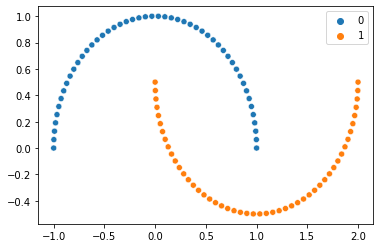

In [17]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)

### Activation function

In [51]:
def linear(z):
    return z

def sigmoid(z):
    return 1 / (1+np.exp(-z))

def tanh(z):
    pass

def softmax(X):
    pass

def relu(z):
    return max(0, z)

### Activation

In [211]:
def Dense(a_in, W, b):  
    z = a_in @ W + b
    a_out = sigmoid(z)
    return a_out

In [212]:
def Sequential(X, W1, b1, W2, b2, W3, b3):
    a1 = Dense(X, W1, b1)
    a2 = Dense(a1, W2, b2)
    a3 = Dense(a2, W3, b3)
    return a3

### Prediction

In [224]:
def Predict(X, W1, b1, W2, b2, W3, b3):    
    output = Sequential(X, W1, b1, W2, b2, W3, b3)
    y_hat = np.zeros_like(output)
    for i in range(len(output)):
        if output[i] > 0.5:
            y_hat[i] = 1
        else:
            y_hat[i] = 0
    return y_hat

### Parameter

In [234]:
# 2 layers
# 4 nodes
X = np.random.uniform(-3, 3, size=(100, 10))
W1 = np.random.uniform(-3, 3, size=(10, 4))
b1 = np.random.uniform(-3, 3, size=(4))
W2 = np.random.uniform(-3, 3, size=(4, 4))
b2 = np.random.uniform(-3, 3, size=(4))
W3 = np.random.uniform(-3, 3, size=(4, 1))
b3 = np.random.uniform(-3, 3, size=(1))
Predict(X,W1,b1,W2,b2,W3,b3)

array([[0.63142989],
       [0.46605946],
       [0.61178624],
       [0.48045298],
       [0.55559227],
       [0.49699546],
       [0.52311207],
       [0.7810592 ],
       [0.54513298],
       [0.80459292],
       [0.64946415],
       [0.51046605],
       [0.70271775],
       [0.76095447],
       [0.6990047 ],
       [0.49675418],
       [0.54587215],
       [0.76227405],
       [0.78155729],
       [0.77217658],
       [0.76052122],
       [0.45078946],
       [0.61217281],
       [0.54501438],
       [0.61158299],
       [0.82922236],
       [0.61060115],
       [0.61135644],
       [0.68334821],
       [0.78872759],
       [0.49629691],
       [0.76992973],
       [0.61186681],
       [0.85450148],
       [0.6396181 ],
       [0.48523998],
       [0.66646879],
       [0.49995536],
       [0.63451222],
       [0.83147635],
       [0.62339447],
       [0.77234763],
       [0.54835264],
       [0.61720442],
       [0.63633032],
       [0.83483846],
       [0.8067298 ],
       [0.693

In [ ]:
df = pd.read_csv('housepricedata.csv')
dataset = df.values
X = dataset[:, :-1]
y = dataset[:, -1]
df.head()